<h1>Handling Outlier

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
csv_path='/Users/wudailing/Downloads/application_train.csv'

In [49]:
train_df=pd.read_csv(csv_path)

In [50]:
train_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [51]:
five_num=[0,25,50,75,100]
quitaile_5s=[np.percentile(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=i) for i in five_num]

In [52]:
quitaile_5s

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]

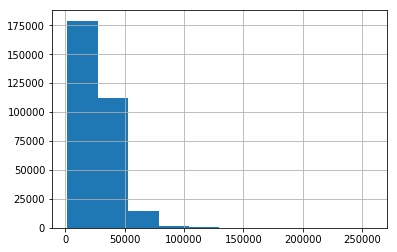

In [53]:
train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist()

In [54]:
train_df[train_df['AMT_ANNUITY']==train_df['AMT_ANNUITY'].max()]=np.percentile(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=99)

In [55]:
train_df[train_df['AMT_ANNUITY']==train_df['AMT_ANNUITY'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
101508,217854.0,0.0,Cash loans,F,N,N,0.0,1575000.0,2303460.0,230161.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
np.percentile(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=99)

70006.5

In [57]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 230161.5]


In [58]:
np.median(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

24903.0

<h1>連續值標準化

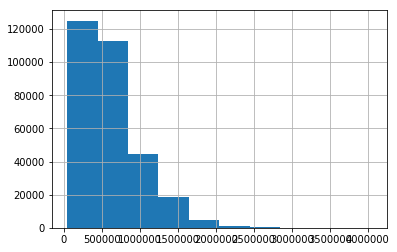

In [59]:
train_df['AMT_CREDIT'].hist()

In [60]:
value=train_df['AMT_CREDIT'].values

In [61]:
train_df['AMT_CREDIT_NORM1']=(value-np.mean(value))/np.std(value)

Text(0.5,1,'Normalized with Z-transform')

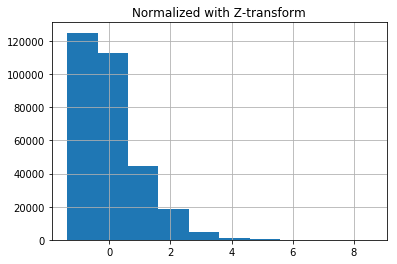

In [62]:
train_df['AMT_CREDIT_NORM1'].hist()
plt.title('Normalized with Z-transform')

In [63]:
train_df['AMT_CREDIT_NORM2']=(value-min(value))/max(value)-min(value)

Text(0.5,1,'normalized to 0~1')

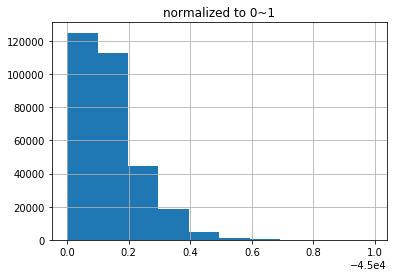

In [64]:
train_df['AMT_CREDIT_NORM2'].hist()
plt.title('normalized to 0~1')

<h1>1. 列出 AMT_ANNUITY 的 q0 - q100

In [107]:
q0_q100=[np.percentile(train_df[~train_df['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=i) for i in range(100)]
q0_q100

[1615.5,
 6183.0,
 6750.0,
 7875.0,
 8703.0,
 9000.0,
 9000.0,
 9556.650000000003,
 10125.0,
 10503.0,
 11074.5,
 11430.0,
 11970.0,
 12375.0,
 12838.5,
 13302.0,
 13500.0,
 13500.0,
 13896.0,
 14350.5,
 14701.5,
 15124.5,
 15583.5,
 15970.5,
 16209.0,
 16524.0,
 16852.5,
 17113.5,
 17487.0,
 17806.5,
 18189.0,
 18643.5,
 19102.5,
 19417.5,
 19836.0,
 20151.0,
 20421.0,
 20853.0,
 21186.0,
 21609.0,
 21870.0,
 22018.5,
 22342.5,
 22527.0,
 22972.5,
 23346.0,
 23719.5,
 23931.0,
 24259.5,
 24588.0,
 24903.0,
 25240.5,
 25537.5,
 25960.5,
 26217.0,
 26316.0,
 26640.0,
 26865.0,
 27189.0,
 27558.0,
 28062.0,
 28480.5,
 28917.0,
 29340.0,
 29827.799999999974,
 30078.0,
 30483.0,
 30895.650000000052,
 31275.0,
 31630.5,
 32004.0,
 32458.5,
 32895.0,
 33376.5,
 33984.0,
 34596.0,
 35343.0,
 35806.5,
 36328.5,
 36747.0,
 37516.5,
 37948.5,
 38556.0,
 39456.0,
 40131.0,
 40806.0,
 41841.0,
 42790.5,
 43735.5,
 44991.0,
 45954.0,
 47254.5,
 48465.0,
 49878.0,
 51745.5,
 53325.0,
 55624.5,
 5848

<h1>2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [71]:
train_df['AMT_ANNUITY']=train_df['AMT_ANNUITY'].replace(np.nan,np.mean(train_df['AMT_ANNUITY']))

<h1>2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

In [75]:
train_df['AMT_ANNUITY_NORM3']=(train_df['AMT_ANNUITY']-min(train_df['AMT_ANNUITY']))/(max(train_df['AMT_ANNUITY'])-min(train_df['AMT_ANNUITY']))

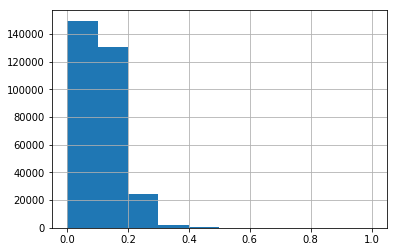

In [76]:
train_df['AMT_ANNUITY_NORM3'].hist()

<h1>3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [89]:
from scipy.stats import mode
Price_Mode=mode(train_df['AMT_GOODS_PRICE'])
Price_Mode=Price_Mode[0][0]

In [91]:
train_df['AMT_GOODS_PRICE']=train_df['AMT_GOODS_PRICE'].replace(np.nan,Price_Mode)